<a href="https://colab.research.google.com/github/suryawahyus/MachineLearning/blob/main/TaskWeek5/EDA_UCL_Attacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/dataset/attacking.csv')
df.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


In [10]:
df.describe()

,serial,assists,corner_taken,offsides,dribbles,match_played
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,47.613636,1.596591,3.340909,1.420455,8.982955,6.988636
std,22.527916,1.042957,6.266257,2.246122,11.190034,2.563454
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,24.000000,1.000000,0.000000,0.000000,2.000000,5.000000
50%,64.000000,1.000000,0.000000,0.000000,5.000000,6.500000
75%,64.000000,2.000000,4.250000,2.000000,12.000000,8.000000
max,64.000000,7.000000,36.000000,10.000000,83.000000,13.000000


In [11]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  176


,Total Missing,In Percent
serial,0,0.0
player_name,0,0.0
club,0,0.0
position,0,0.0
assists,0,0.0
corner_taken,0,0.0
offsides,0,0.0
dribbles,0,0.0
match_played,0,0.0


In [12]:
df=df.drop(['player_name'],axis=1)
df.head()

,serial,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Man. United,Midfielder,7,10,2,7,7
1,2,Real Madrid,Forward,6,3,4,83,13
2,2,Bayern,Midfielder,6,3,3,32,10
3,4,Ajax,Forward,5,3,4,28,7
4,5,Liverpool,Defender,4,36,0,9,9


In [16]:
Q=df['dribbles'].value_counts()
P=df['club'].value_counts()

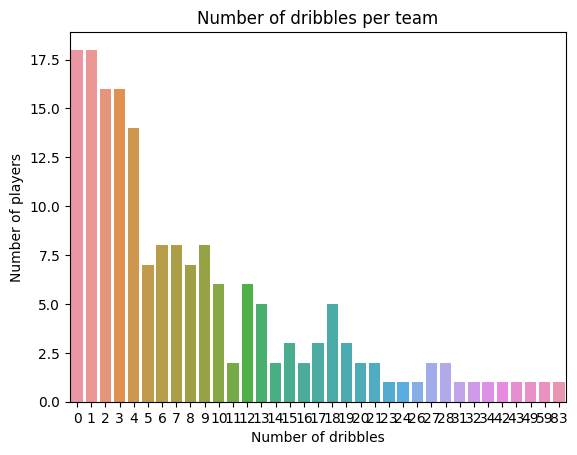

In [17]:
sns.barplot(x=Q.index, y=Q.values)

plt.xlabel('Number of dribbles')
plt.ylabel('Number of players')
plt.title('Number of dribbles per team')
plt.savefig('Number of dribbles per team')
plt.show()

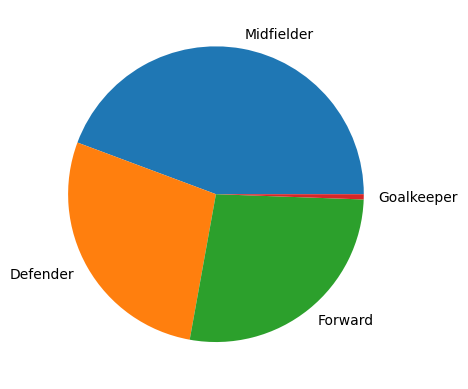

In [18]:
plt.pie(df['position'].value_counts().values,labels=df['position'].value_counts().index)
plt.show()

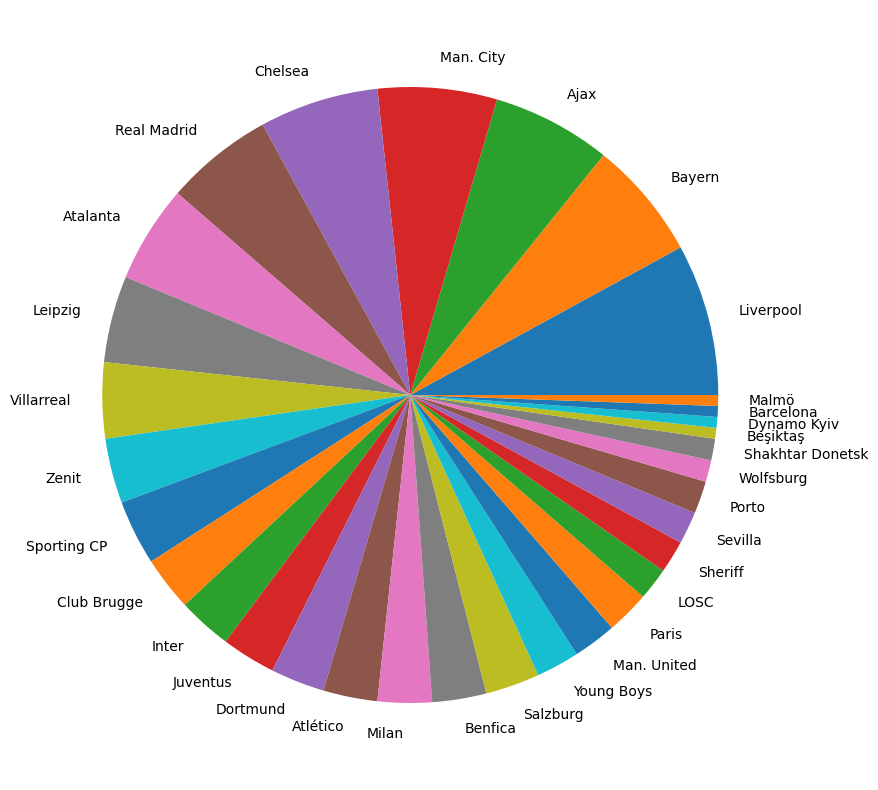

In [19]:
fig = plt.figure(figsize = (10, 10))
plt.pie(df['club'].value_counts().values,labels=df['club'].value_counts().index)
plt.show()

In [25]:
A=df['corner_taken'].value_counts()
B=df['offsides'].value_counts()

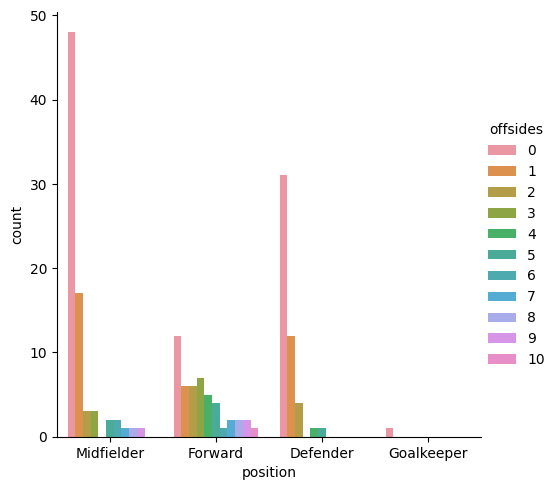

In [27]:
sns.catplot(x="position",hue="offsides",kind="count", data=df)

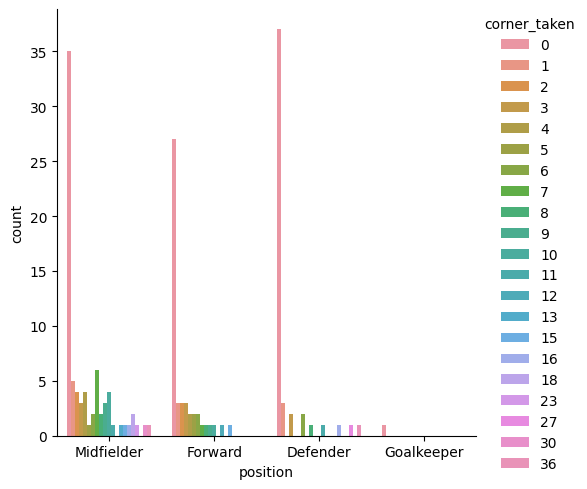

In [28]:
sns.catplot(x="position",hue="corner_taken",kind="count", data=df)

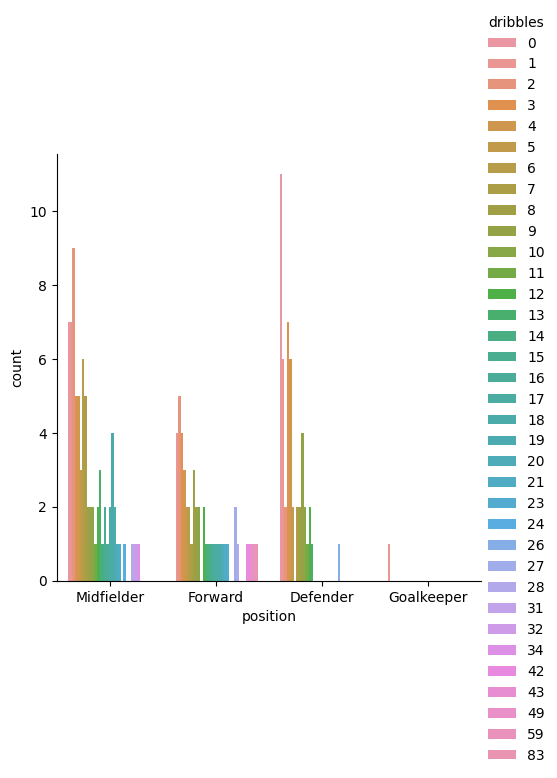

In [29]:
sns.catplot(x="position",hue="dribbles",kind="count", data=df)